## Machine Learning Internship in collaboration with Start Tech Academy

#### TASK 2: Build a Deep learning model to detect if osteoarthritis is present or not in a given knee X-ray image.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten, Dense, Dropout, Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from tqdm import tqdm

NOTE: all images in the dataset is 224 X 224

In [3]:
datadir="D:/Deep Learning/train"
categories=["Normal","Osteoarthritis"]

IMG_SIZE = 60

In [5]:
training_data=[]

def create_training_data():
    for category in categories:  

        path = os.path.join(datadir,category) 
        class_num = categories.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e: 
                pass
           
create_training_data()


print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1540/1540 [00:02<00:00, 744.88it/s]

2350


In [6]:
random.shuffle(training_data)

In [7]:
X=[]
y=[]
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y=np.array(y)
X.shape   #(2350, 60, 60, 1)

y.shape  #(2350,)

(2350,)

In [8]:
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [9]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

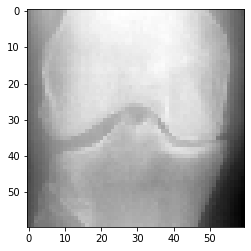

In [10]:
plt.imshow(X[0],cmap="gray") 
plt.show()

In [11]:
X[0]

array([[[138],
        [148],
        [154],
        ...,
        [112],
        [107],
        [100]],

       [[136],
        [148],
        [154],
        ...,
        [114],
        [109],
        [101]],

       [[134],
        [145],
        [152],
        ...,
        [112],
        [109],
        [103]],

       ...,

       [[ 95],
        [101],
        [124],
        ...,
        [ 36],
        [ 34],
        [ 27]],

       [[ 95],
        [102],
        [131],
        ...,
        [ 37],
        [ 32],
        [ 28]],

       [[ 95],
        [107],
        [123],
        ...,
        [ 37],
        [ 33],
        [ 27]]], dtype=uint8)

In [12]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

### Neural Network Architecture:

In [15]:
X=X/255.0    #normalization

model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32,(3,3),activation='relu', padding ='same'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32,(3,3),activation='relu', padding ='same'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(32))
model.add(Dense(32))

model.add(Dense(32))



model.add(Dense(1))
model.add(Activation("sigmoid"))


#model.add(Dense(units=5,activation='softmax'))


model.compile(loss="binary_crossentropy",optimizer="adam", metrics=['accuracy'])


model.fit(X,y,batch_size=32,epochs=10)

Epoch 1/10
74/74 [==============================] - 9s 97ms/step - loss: 0.6497 - accuracy: 0.6519
Epoch 2/10
74/74 [==============================] - 7s 97ms/step - loss: 0.6459 - accuracy: 0.6553
Epoch 3/10
74/74 [==============================] - 7s 97ms/step - loss: 0.6457 - accuracy: 0.6553
Epoch 4/10
74/74 [==============================] - 7s 97ms/step - loss: 0.6460 - accuracy: 0.6553
Epoch 5/10
74/74 [==============================] - 7s 98ms/step - loss: 0.6454 - accuracy: 0.6553
Epoch 6/10
74/74 [==============================] - 7s 95ms/step - loss: 0.6453 - accuracy: 0.6553
Epoch 7/10
74/74 [==============================] - 7s 96ms/step - loss: 0.6452 - accuracy: 0.6553
Epoch 8/10
74/74 [==============================] - 7s 96ms/step - loss: 0.6448 - accuracy: 0.6553
Epoch 9/10
74/74 [==============================] - 8s 112ms/step - loss: 0.6447 - accuracy: 0.6553
Epoch 10/10
74/74 [==============================] - 9s 122ms/step - loss: 0.6460 - accuracy: 0.6553


## Evaluation on Testing Dataset

In [16]:
datadir="D:/Deep Learning/test"
categories=["Normal","Osteoarthritis"]
for i in categories:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        
        
IMG_SIZE=60 
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

testing_data=[]

def create_testing_data():
    for category in categories:  

        path = os.path.join(datadir,category) 
        class_num = categories.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                testing_data.append([new_array, class_num])  
            except Exception as e: 
                pass
           
create_testing_data()


print(len(testing_data))

100%|███████████████████████████████████████████████████████████████████████████████| 276/276 [00:00<00:00, 462.86it/s]

845


In [17]:
random.shuffle(testing_data)

X_test=[]
y_test=[]
for features,labels in testing_data:
    X_test.append(features)
    y_test.append(labels)
X_test=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_test=np.array(y_test)

X_test=X_test/255.0

model.fit(X_test,y_test,epochs=10)

Epoch 1/10
27/27 [==============================] - 3s 94ms/step - loss: 0.6675 - accuracy: 0.6189
Epoch 2/10
27/27 [==============================] - 3s 94ms/step - loss: 0.6334 - accuracy: 0.6769
Epoch 3/10
27/27 [==============================] - 2s 92ms/step - loss: 0.6224 - accuracy: 0.6651
Epoch 4/10
27/27 [==============================] - 2s 91ms/step - loss: 0.5946 - accuracy: 0.7018
Epoch 5/10
27/27 [==============================] - 2s 91ms/step - loss: 0.5795 - accuracy: 0.7089
Epoch 6/10
27/27 [==============================] - 2s 92ms/step - loss: 0.5578 - accuracy: 0.7219
Epoch 7/10
27/27 [==============================] - 2s 93ms/step - loss: 0.5537 - accuracy: 0.7160
Epoch 8/10
27/27 [==============================] - 2s 91ms/step - loss: 0.5352 - accuracy: 0.7456
Epoch 9/10
27/27 [==============================] - 2s 92ms/step - loss: 0.5161 - accuracy: 0.7527
Epoch 10/10
27/27 [==============================] - 2s 92ms/step - loss: 0.4766 - accuracy: 0.7645


### Resuts:

Accuracy of the model with training data: **88.04%**<br>
Accuracy of the model with testing data: **83.08%**